In [2]:
# 2017.11.29 Sheng Wan
# Data Explore
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output

train = pd.read_csv("/Users/shengwan/Desktop/train.csv", parse_dates=['srch_ci', 'srch_co'], nrows=10000)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
date_time                    10000 non-null object
site_name                    10000 non-null int64
posa_continent               10000 non-null int64
user_location_country        10000 non-null int64
user_location_region         10000 non-null int64
user_location_city           10000 non-null int64
orig_destination_distance    6271 non-null float64
user_id                      10000 non-null int64
is_mobile                    10000 non-null int64
is_package                   10000 non-null int64
channel                      10000 non-null int64
srch_ci                      9993 non-null datetime64[ns]
srch_co                      9993 non-null datetime64[ns]
srch_adults_cnt              10000 non-null int64
srch_children_cnt            10000 non-null int64
srch_rm_cnt                  10000 non-null int64
srch_destination_id          10000 non-null int64
srch_destination_type_id

In [3]:
sns.set()

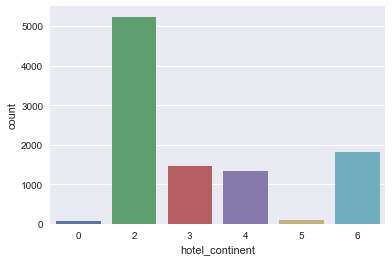

In [4]:
#hotel continent
sns.countplot(x='hotel_continent', data=train)

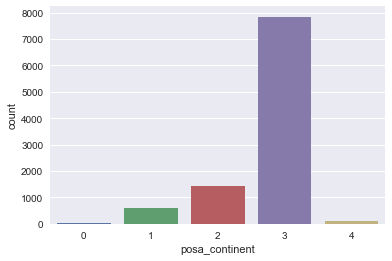

In [5]:
#users' continent
sns.countplot(x='posa_continent', data=train)

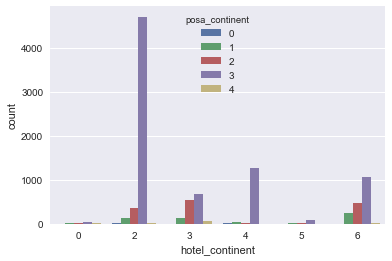

In [6]:
#Users' target hotel continent distributions
sns.countplot(x='hotel_continent', hue='posa_continent', data=train)

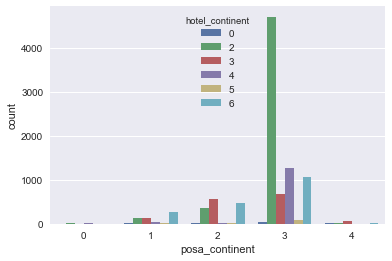

In [7]:
sns.countplot(x='posa_continent', hue='hotel_continent', data=train)

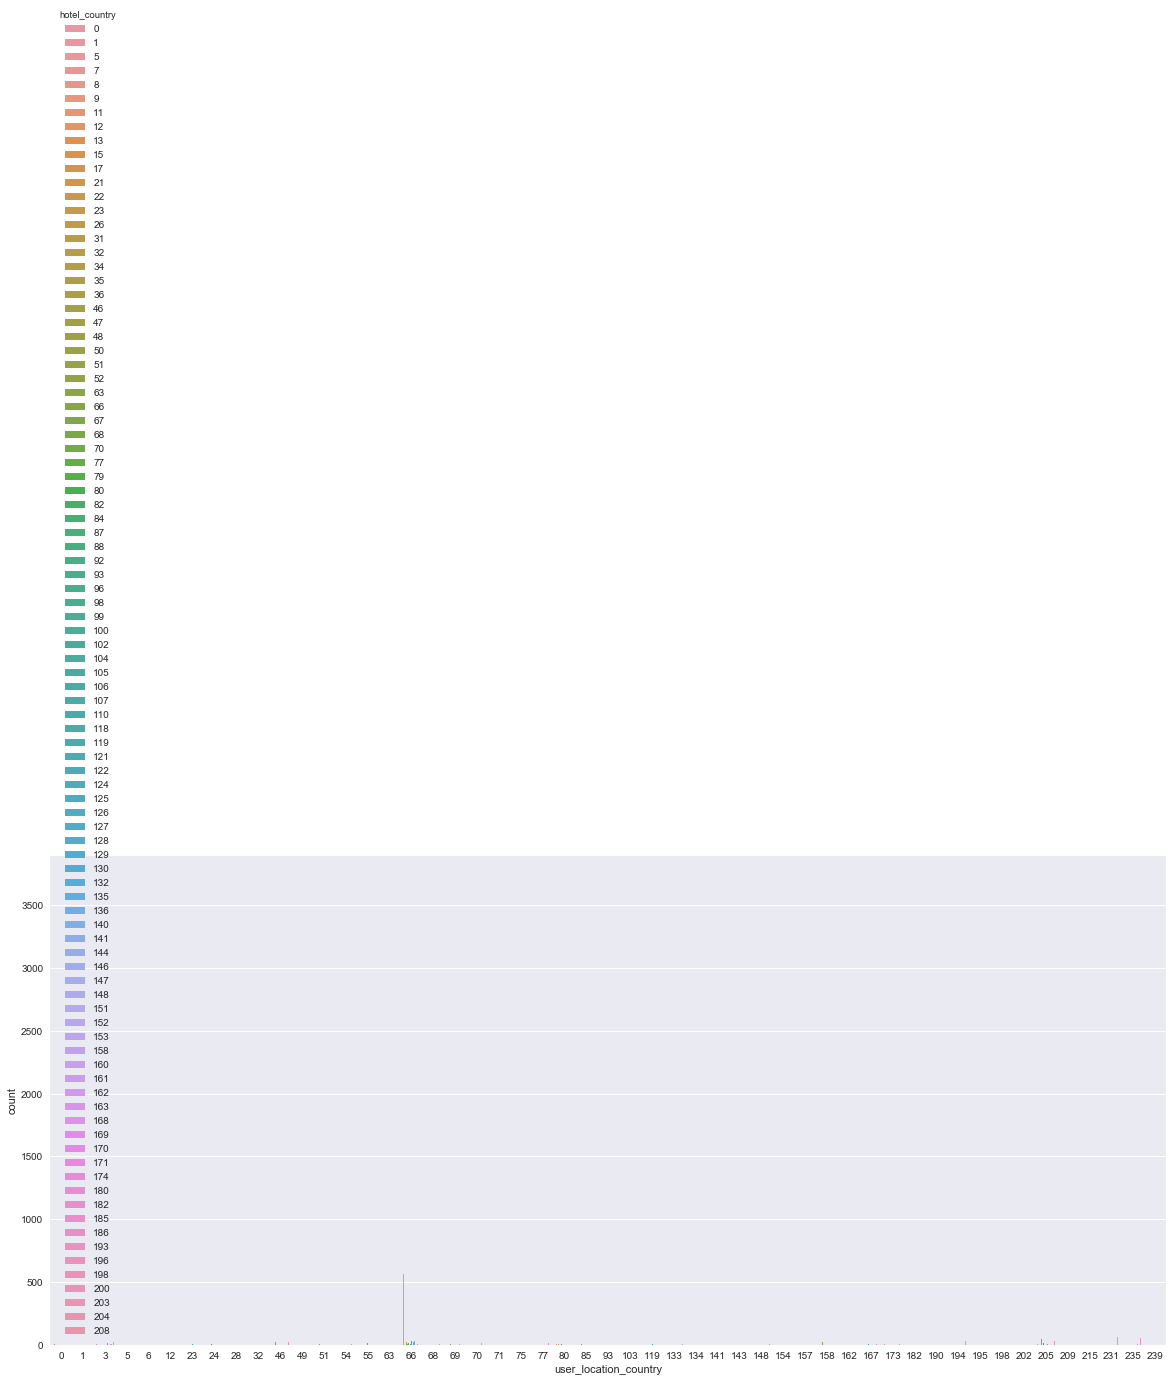

In [64]:
plt.figure(figsize=(20, 9))
sns.countplot(x='user_location_country', hue='hotel_country', data=train)


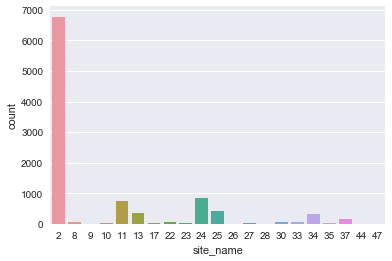

In [10]:
sns.countplot(x='site_name', data=train)

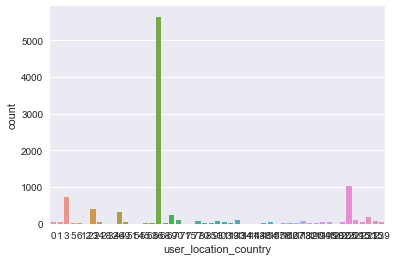

In [11]:
sns.countplot(x='user_location_country', data=train)

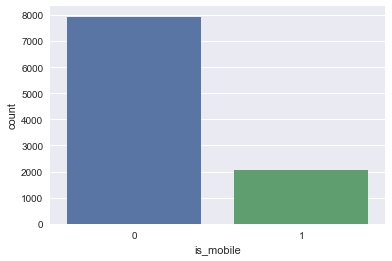

In [13]:
sns.countplot(x='is_mobile', data=train)

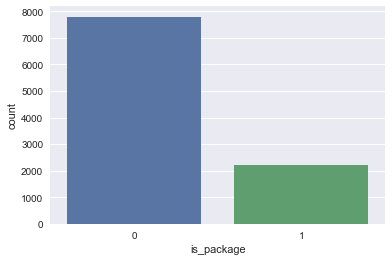

In [15]:
sns.countplot(x='is_package', data=train)

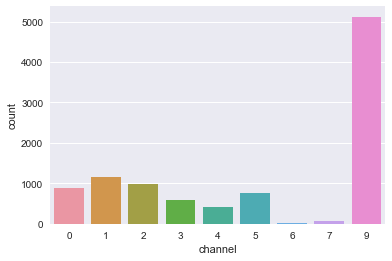

In [16]:
sns.countplot(x='channel', data=train)

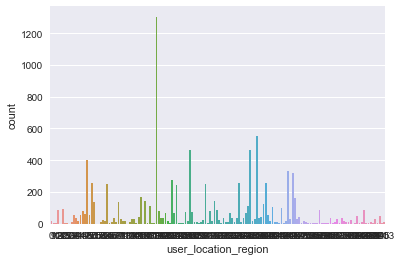

In [17]:
sns.countplot(x='user_location_region', data=train)

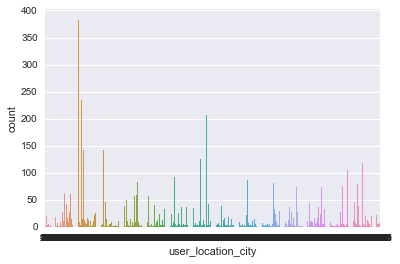

In [18]:
sns.countplot(x='user_location_city', data=train)

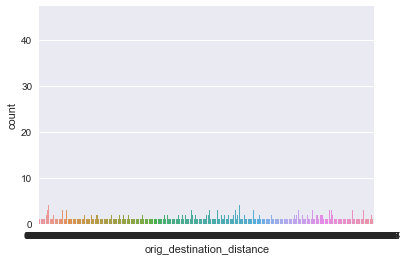

In [19]:
sns.countplot(x='orig_destination_distance', data=train)

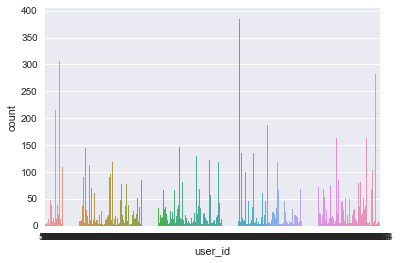

In [20]:
sns.countplot(x='user_id', data=train)

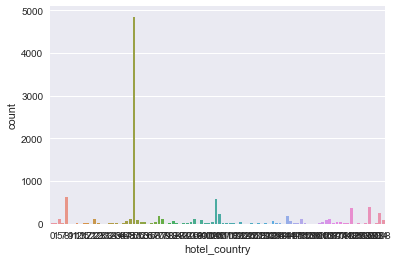

In [21]:
sns.countplot(x='hotel_country', data=train)

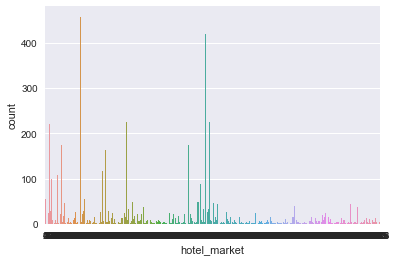

In [23]:
sns.countplot(x='hotel_market', data=train)

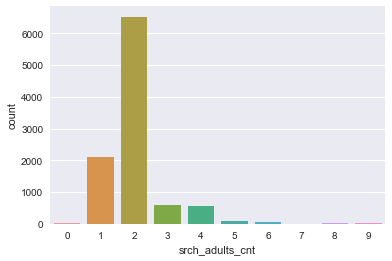

In [24]:
sns.countplot(x='srch_adults_cnt', data=train)

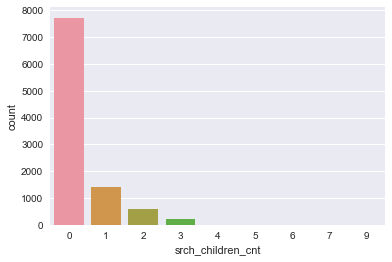

In [25]:
sns.countplot(x='srch_children_cnt', data=train)

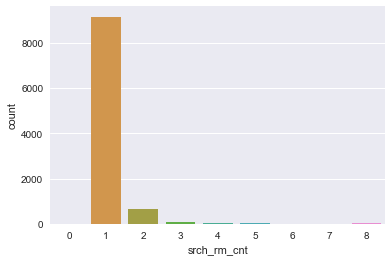

In [26]:
sns.countplot(x='srch_rm_cnt', data=train)

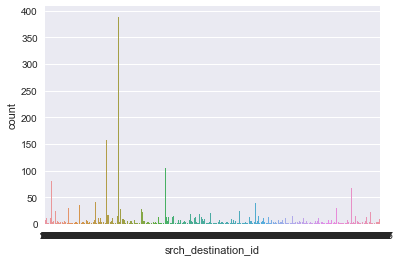

In [27]:
sns.countplot(x='srch_destination_id', data=train)

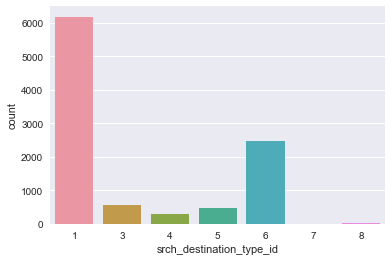

In [28]:
sns.countplot(x='srch_destination_type_id', data=train)

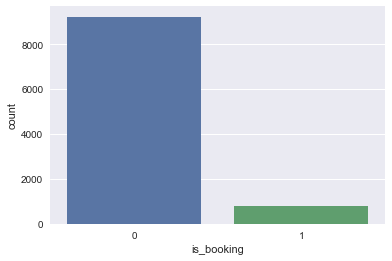

In [29]:
sns.countplot(x='is_booking', data=train)

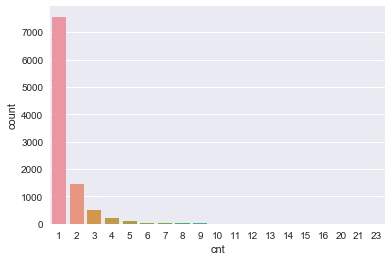

In [30]:
sns.countplot(x='cnt', data=train)

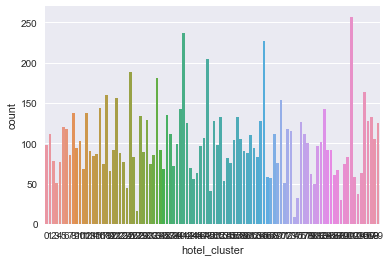

In [31]:
sns.countplot(x='hotel_cluster', data=train)

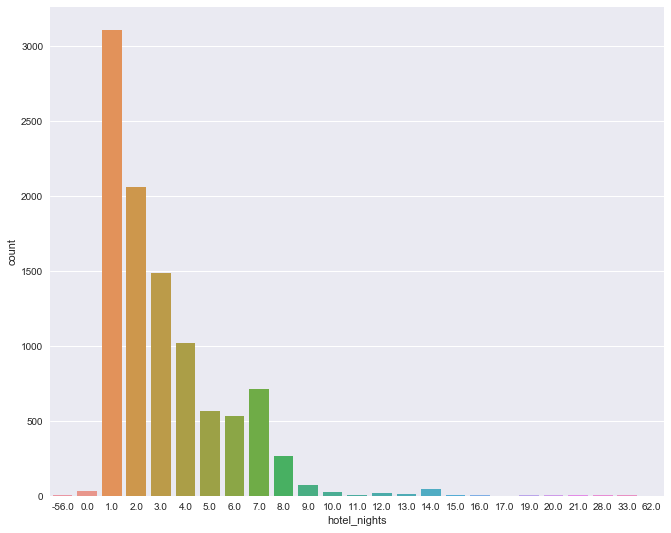

In [56]:
hotel_nights = train['srch_co'] - train['srch_ci']
hotel_nights = (hotel_nights / np.timedelta64(1, 'D'))
train['hotel_nights'] = hotel_nights
plt.figure(figsize=(11, 9))
sns.countplot(x='hotel_nights', data=train)

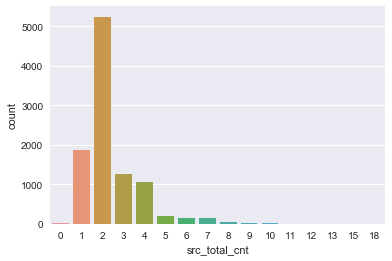

In [57]:
src_total_cnt = train.srch_adults_cnt + train.srch_children_cnt
train['src_total_cnt'] = src_total_cnt
sns.countplot(x='src_total_cnt', data=train)

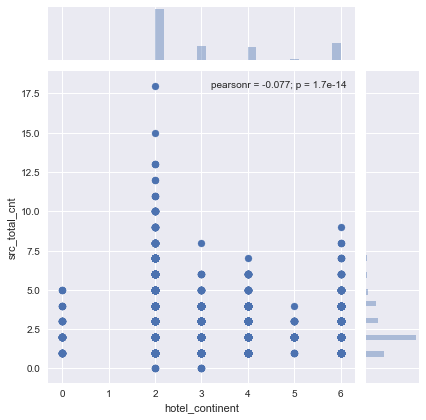

In [58]:
sns.jointplot(x='hotel_continent',y='src_total_cnt', data=train)

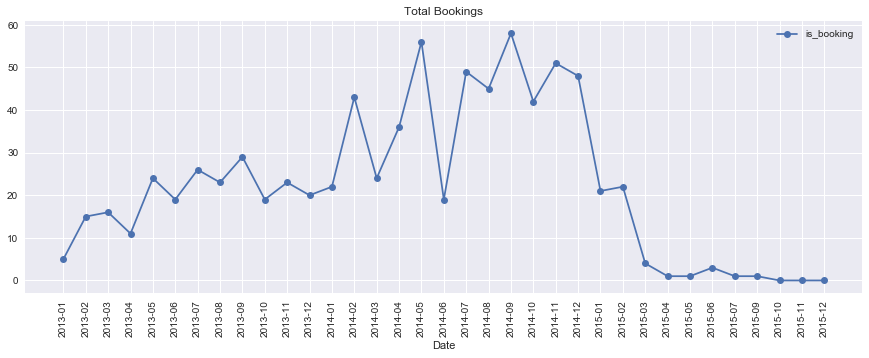

In [60]:
train['Date']  = train['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)
date_bookings  = train.groupby('Date')["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(15,5)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)